In [1]:
%matplotlib inline
#import required packages
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.externals import joblib

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Loading the dataset(housing)

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
#the last five rows
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
# the first five rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# gives an information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# generate a report on the data(exploratory analysis)
pp.ProfileReport(df)

In [7]:
#counts the value of each category in the ocean proximity column
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
#describes the data in statistics kinda way
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#returns the keys of each column
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F28BC94358>,
      dtype=object)

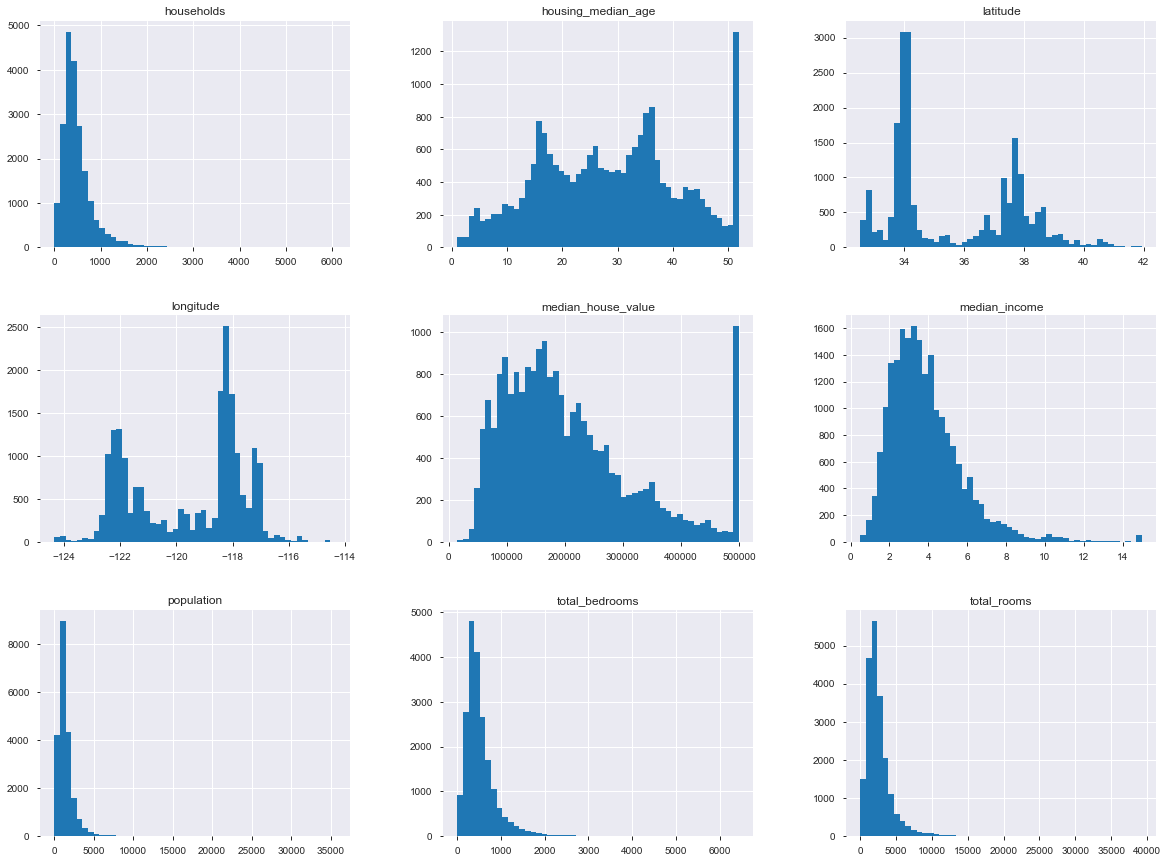

In [10]:
# draws a histogram of all numerical data in the dataset
df.hist(bins=50,figsize=(20,15))

# Spliting the dataset into test and train sets

In [11]:
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

In [12]:
#use cut to create categories.here income category is created from the meadian income 
df['income_cat'] = pd.cut(x=df['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

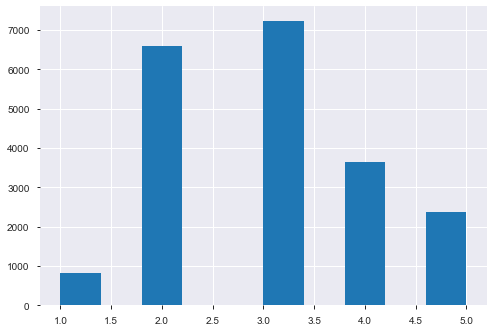

In [13]:
df['income_cat'].hist()

In [14]:
#for stratified sampling based on income category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
#df

In [16]:
# to drop the income category column of the sets after this cell,strat_train_set & strat_test_set will no longer have income cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [17]:
# makin a copy of the training set to avoid tampering with the original copy
train_explore = strat_train_set.copy()

In [18]:
#strat_train_set

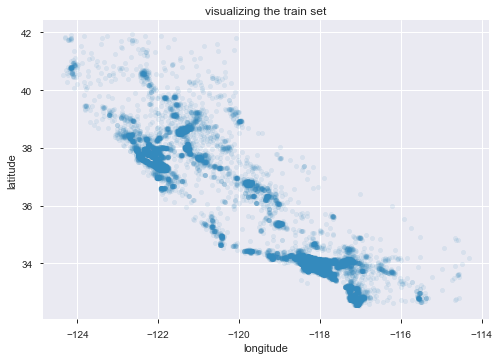

In [19]:
# to plot longitude against latitute
train_explore.plot(x='longitude',y='latitude',kind='scatter',title='visualizing the train set',alpha=0.1)

# More visualisation

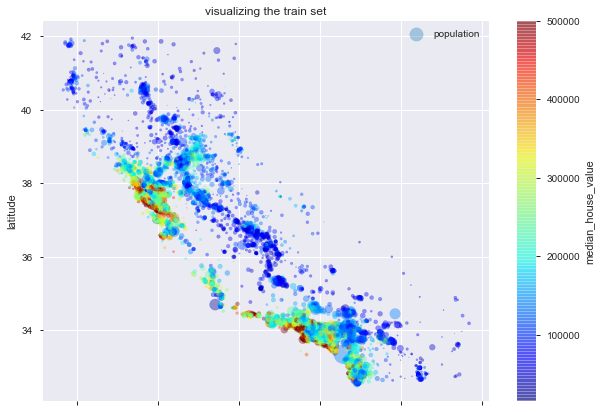

In [20]:
train_explore.plot(x='longitude',y='latitude',kind='scatter',title='visualizing the train set',alpha=0.4,s=train_explore['population']/100,label='population',figsize=(10,7),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [24]:
#looking for correlations
pp.ProfileReport(train_explore)

In [21]:
# correlation
corr_matrix = train_explore.corr()

In [22]:
# correlate each value with median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

# Correlation with pandas scatter_matrix function

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F28AC0EBE0>,
      dtype=object)

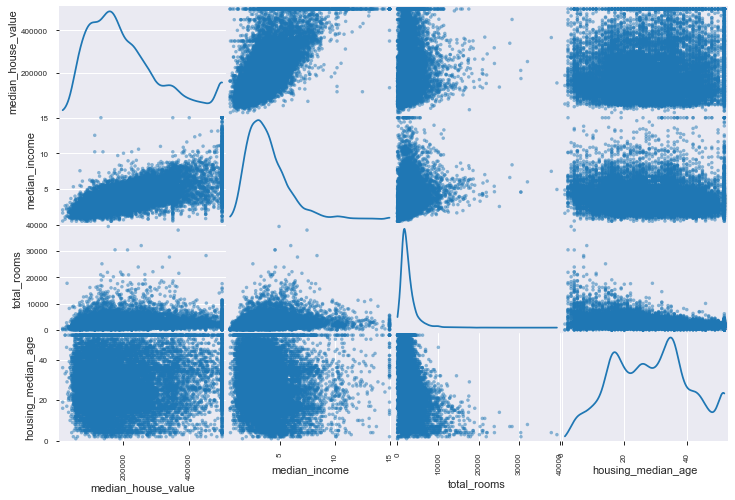

In [23]:
#lookingfor correlation with pandas scatter_matrix function
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
pd.plotting.scatter_matrix(train_explore[attributes], diagonal='kde',figsize=(12, 8))

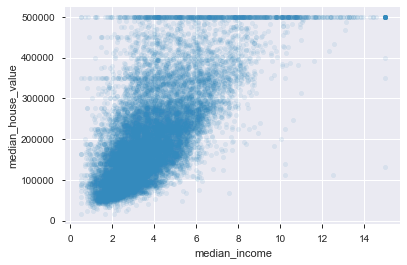

In [28]:
#plotting median income against median house value
train_explore.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [24]:
# combining some attributes
train_explore["rooms_per_household"] =train_explore["total_rooms"]/train_explore["households"]
train_explore["bedrooms_per_room"] = train_explore["total_bedrooms"]/train_explore["total_rooms"]
train_explore["population_per_household"]=train_explore["population"]/train_explore["households"]

In [25]:
train_explore

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,5.505618,0.193878,3.808989


# Checking out the correlations

In [26]:
#checking out the correlation again
corr_matrix = train_explore.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Preparing data for ML algorithms

In [27]:
# remember we only copied strat_train_set as train_explore
# now we are removing the labels from the training set.
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### NB: housing is kinda same as train_explore without the labels

### Data cleaning


In [28]:
median_values = housing['total_bedrooms'].median()

In [29]:
housing["total_bedrooms"].fillna(median_values, inplace=True)

# Handling missing values with SimpleImputer 

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [31]:
#to create a copy of the data without the text attribute ocean_proximity:
housing_num = housing.drop("ocean_proximity", axis=1)
#Now you can fit the imputerinstance to the training data using the fit()method:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [32]:
#The imputer has simply computed the median of each attribute and stored the result in its  statistics_instance variable
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now you can use this “trained”  imputerto transform the training set by replacing
missing values by the learned medians:
X = imputer.transform(housing_num)
The result is a plain NumPy array containing the transformed features. If you want to
put it back into a Pandas DataFrame, it’s simple:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [33]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

# Handling Text and Categorical Attributes

In [34]:
#the reason for the [[]] is to make it a dataframe and not a series
housing_cat = housing[['ocean_proximity']]

In [35]:
print(housing_cat)

      ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
...               ...
6563           INLAND
12053          INLAND
13908          INLAND
11159       <1H OCEAN
15775        NEAR BAY

[16512 rows x 1 columns]


# Handling categorical values 
OrdinalEncoderclass or OneHotEncoder

In [36]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [37]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [38]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)


In [39]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# Creating custom transformers


In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Feature scaling

TYPES
1: min-max(normalization)-values are shifted and rescaled so that they end up ranging from 0 to 1 We do this by subtract‐
ing the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called  MinMaxScalerfor this. It has a  feature_range  hyperparameter
that lets you change the range if you don’t want 0–1 for some reason.
2:Standardization is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that
the resulting distribution has unit variance. Unlike min-max scaling, standardization
does not bound values to a specific range, which may be a problem for some algo‐
rithms (e.g., neural networks often expect an input value ranging from 0 to 1). How‐
ever, standardization is much less affected by outliers. For example, suppose a district
had a median income equal to 100 (by mistake). Min-max scaling would then crush
all the other values from 0–15 down to 0–0.15, whereas standardization would not be
much affected. Scikit-Learn provides a transformer called StandardScalerfor stand‐
ardization.
As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set).
Only then can you use them to transform the training set and the
test set (and new data).

# Transformation pippelines

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('attribs_adder',CombinedAttributesAdder()),('std_scaler',StandardScaler()),])
housing_num_tr = num_pipeline.fit_transform(housing_num)

# Handling both categorical and numerical features together
So far, we have handled the categorical columns and the numerical columns sepa‐
rately. It would be more convenient to have a single transformer able to handle all col‐
umns, applying the appropriate transformations to each column. In version 0.20,
Scikit-Learn introduced the ColumnTransformerfor this purpose, and the good news
is that it works great with Pandas DataFrames. Let’s use it to apply all the transforma‐
tions to the housing data:

In [43]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),('cat',OneHotEncoder(),cat_attribs)])

In [44]:
housing_prepared = full_pipeline.fit_transform(housing) #here housing is the Stratified training set without the labels

Here is how this works: first we import the ColumnTransformer  class, next we get the
list of numerical column names and the list of categorical column names, and we
construct a ColumnTransformer. The constructor requires a list of tuples, where each
tuple contains a name
22
, a transformer and a list of names (or indices) of columns
that the transformer should be applied to. In this example, we specify that the numer‐
ical columns should be transformed using the  num_pipelinethat we defined earlier,
and the categorical columns should be transformed using a  OneHotEncoder. Finally,
we apply this ColumnTransformerto the housing data: it applies each transformer to
the appropriate columns and concatenates the outputs along the second axis (the
transformers must return the same number of rows).
Note that the OneHotEncoderreturns a sparse matrix, while the num_pipelinereturns
a dense matrix. When there is such a mix of sparse and dense matrices, the  Colum
nTransformerestimates the density of the final matrix (i.e., the ratio of non-zero
cells), and it returns a sparse matrix if the density is lower than a given threshold (by
default,  sparse_threshold=0.3). In this example, it returns a dense matrix. And
that’s it! We have a preprocessing pipeline that takes the full housing data and applies
the appropriate transformations to each column.

# Training models

### LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Evaluation on training set

In [46]:
# we pick some rows from the tarining set
some_data = housing.iloc[:5] #5 rows
some_labels = housing_labels.iloc[:5] #5 labels
some_data_prepared = full_pipeline.transform(some_data) 
print('Predictions',lin_reg.predict(some_data_prepared).round(2))
print("Labels",list(some_labels))


Predictions [210644.6  317768.81 210956.43  59218.99 189747.56]
Labels [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


#### The regression model’s RMSE

In [47]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [48]:
lin_rmse

68628.19819848923

# Saving the model

In [49]:
joblib.dump(lin_reg,'linearRegressionModel.pkl')

['linearRegressionModel.pkl']

# Training a DecisionTreeRegressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [52]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [53]:
#clearly it overfits

# Better Evaluation Using Cross-Validation

A great alternative is to use Scikit-Learn’s K-fold cross-validationfeature. The follow‐
ing code randomly splits the training set into 10 distinct subsets called  folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array con‐
taining the 10 evaluation scores

In [54]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [55]:
#display the results
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())
display_scores(tree_rmse_scores)    

Scores: [69049.01459297 66926.28607173 71022.05678783 69796.61776911
 71205.9631946  75984.56405962 70673.49390887 71059.09698702
 76634.8533538  70339.97036403]
Mean: 71269.19170895923
Standard deviation: 2798.4115598721105


In [56]:
#using cross val on lin reg model compute the scores for lin_reg model
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66771.53350253 66961.32743093 70348.5889644  74742.77256023
 68031.13388938 71193.84183426 64969.07833723 68281.61137997
 71549.12800334 67665.10082067]
Mean: 69051.41167229353
Standard deviation: 2732.9473218183202


#### The DecisionTree model overfits so badly that it performs worse than the LinearRegression model.

# Training a RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [58]:
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse= mean_squared_error(housing_labels,forest_predictions)
forest_rmse = np.sqrt(forest_mse)

In [60]:
forest_rmse

18737.49573816196

In [61]:
#appling cross val on the RandomForestRegressor model
forest_mse_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_mse_scores)
display_scores(forest_rmse_scores)

Scores: [49613.957585   47213.1029783  49748.13329825 52187.58376291
 49419.29241822 53412.67905156 49267.15434744 47966.42091259
 53247.91754748 50157.60078991]
Mean: 50223.38426916607
Standard deviation: 1987.3522752071528


# Fine-Tune the selected Model(best)

Grid Search
One way to do that would be to fiddle with the hyperparameters manually, until you
find a great combination of hyperparameter values. This would be very tedious work,
and you may not have time to explore many combinations.
Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to
do is tell it which hyperparameters you want it to experiment with, and what values to
try out, and it will evaluate all the possible combinations of hyperparameter values,
using cross-validation. For example, the following code searches for the best combi‐
nation of hyperparameter values for the RandomForestRegressor:


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [64]:
#best combinations of params
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [65]:
#best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
#evaluation scores
cvres = grid_search.cv_results_

In [67]:
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

64171.313460291865 {'max_features': 2, 'n_estimators': 3}
55355.27661492985 {'max_features': 2, 'n_estimators': 10}
53017.34342794172 {'max_features': 2, 'n_estimators': 30}
60338.80115288415 {'max_features': 4, 'n_estimators': 3}
52918.94935578653 {'max_features': 4, 'n_estimators': 10}
50581.1332281946 {'max_features': 4, 'n_estimators': 30}
58929.70807586555 {'max_features': 6, 'n_estimators': 3}
52181.98739086951 {'max_features': 6, 'n_estimators': 10}
49984.64086311854 {'max_features': 6, 'n_estimators': 30}
58019.717760894084 {'max_features': 8, 'n_estimators': 3}
52068.90992531502 {'max_features': 8, 'n_estimators': 10}
50012.77562986113 {'max_features': 8, 'n_estimators': 30}
64561.85132350959 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54477.36982144125 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60252.16560691969 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52255.38021369668 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

Randomized Search
The grid search approach is fine when you are exploring relatively few combinations,
like in the previous example, but when the hyperparameter  search spaceis large, it is
often preferable to use  RandomizedSearchCVinstead. This class can be used in much
the same way as the  GridSearchCVclass, but instead of trying out all possible combi‐
nations, it evaluates a given number of random combinations by selecting a random
value for each hyperparameter at every iteration. This approach has two main bene‐
fits:
    • If you let the randomized search run for, say, 1,000 iterations, this approach will
explore 1,000 different values for each hyperparameter (instead of just a few val‐
ues per hyperparameter with the grid search approach).
    • You have more control over the computing budget you want to allocate to hyper‐
parameter search, simply by setting the number of iterations.

Ensemble Methods
Another way to fine-tune your system is to try to combine the models that perform
best. The group (or “ensemble”) will often perform better than the best individual
model (just like Random Forests perform better than the individual Decision Trees
they rely on), especially if the individual models make very different types of errors.
We will cover this topic in more detail in Chapter 7.

# Analyze the Best Models and Their Errors

In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.57108333e-02, 6.81200342e-02, 4.37815452e-02, 1.82266359e-02,
       1.76913583e-02, 1.86843694e-02, 1.59606005e-02, 3.03749903e-01,
       7.25455149e-02, 1.12764043e-01, 9.31440986e-02, 1.80861231e-02,
       1.28058318e-01, 1.31153456e-04, 6.08220243e-03, 7.26326734e-03])

In [69]:
#Let’s display these importance scores next to their corresponding attribute names:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.30374990278134006, 'median_income'),
 (0.12805831763969525, 'INLAND'),
 (0.11276404304869905, 'pop_per_hhold'),
 (0.0931440985680532, 'bedrooms_per_room'),
 (0.07571083326980484, 'longitude'),
 (0.07254551489657626, 'rooms_per_hhold'),
 (0.06812003416316097, 'latitude'),
 (0.043781545168882156, 'housing_median_age'),
 (0.018684369381794356, 'population'),
 (0.018226635911836823, 'total_rooms'),
 (0.018086123118723218, '<1H OCEAN'),
 (0.01769135827750952, 'total_bedrooms'),
 (0.015960600545025124, 'households'),
 (0.007263267342467837, 'NEAR OCEAN'),
 (0.006082202430599278, 'NEAR BAY'),
 (0.00013115345583208194, 'ISLAND')]

# Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs
sufficiently well. Now is the time to evaluate the final model on the test set. There is
nothing special about this process; just get the predictors and the labels from your
test set, run your  full_pipeline  to transform the data (call  transform(),  not
fit_transform(), you do not want to fit the test set!), and evaluate the final model
on the test set

In [70]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value',axis =1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [71]:
final_rmse

48098.12698015976

In some cases, such a point estimate of the generalization error will not be quite
enough to convince you to launch: what if it is just 0.1% better than the model cur‐
rently in production? You might want to have an idea of how precise this estimate is.
For this, you can compute a 95% confidenceinterval for the generalization error using
scipy.stats.t.interval():

In [72]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([46122.84326887, 49995.42945904])

# Saving the final model

In [73]:
joblib.dump(final_model,'my_RandomForestRegressor.pkl')

['my_RandomForestRegressor.pkl']

In [ ]:
# Saving predictions
predictions = pd.DataFrame(final_predictionss,columns=['predicted_median_income'])
actual_median_income = X_test['median_income']
actual_median_income.reset_index(drop=True)
final_predicted_ =pd.concat([predictions,actual_median_income],axis=1)
final_predicted_.to_